In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_knn_reg(X

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6826,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6827,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6828,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


In [3]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-09-03,Tai Tuivasa,Ciryl Gane,lose,KO/TKO:Punches,-0.00892,-3.061301,-0.018213,0.008337,-0.344915,-0.735658,-0.107919,-0.470979,-0.657553,-0.808609,1.358824,-1.448854,1.671822,-0.378408,2.840653,-1.062286
1,2022-09-03,Robert Whittaker,Marvin Vettori,win,U-DEC:,-0.00892,1.509291,0.376643,0.008337,-0.595105,-0.243700,0.329916,-0.566771,0.152724,-0.158179,-0.190989,0.153258,-1.281305,0.132985,-0.589427,1.089064
2,2022-09-03,Joaquin Buckley,Nassourdine Imavov,lose,U-DEC:,-0.00892,-0.214047,-0.807926,-1.691263,0.305581,0.283399,-0.208958,-1.620484,-0.305805,-1.540343,-0.166486,-0.352672,1.671822,-0.097141,0.553933,0.013389


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.42, 0.26, 0.31, 0.28, 0.58, 0.19, 0.19, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.04,0.0,0.0
sapm_dif,0.05,0.31,0.01,0.14
slpm_dif,0.17,0.42,0.03,0.04
stance_win_ratio,0.05,0.03,0.02,0.02
str. acc._dif,0.11,0.26,0.04,0.08
str. def_dif,0.09,0.28,0.05,0.11
sub. avg._dif,0.07,0.04,0.39,0.04
td acc._dif,0.05,0.15,0.01,0.19
td avg._dif,0.08,0.09,0.04,0.58


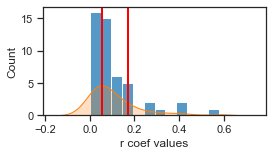

In [4]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

## <span style='color:green'> **[done]** </span> Random Forest regression model training:

In [5]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6829, 22), train_set=(3337, 12), validation_set=(1470, 12), test_set=(2022, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,lose,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6827,test,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6828,train,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


In [6]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=10)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,lose,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,0.045251,0.045251,0.045251,0.045251
6827,test,2017-07-29,Jarred Brooks,Eric Shelton,win,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,-0.093200,-0.093200,-0.093200,-0.093200
6828,train,2017-07-29,Drew Dober,Joshua Burkman,win,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,0.387215,0.387215,0.387215,0.387215


In [7]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='test']
    pred = df[column+'_pred'][df.set=='test'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.878900


In [8]:
sum_table = pd.DataFrame(columns=['n_estimators','kd_accuracy','str_accuracy','td_accuracy','sub_accuracy','mean_accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_grad_desc_step(X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.06s/it]


,n_estimators,kd_accuracy,str_accuracy,td_accuracy,sub_accuracy,mean_accuracy
3,16,0.8865,0.8862,0.8690,0.8833,0.8813
4,32,0.8888,0.8864,0.8700,0.8844,0.8824
5,64,0.8899,0.8875,0.8703,0.8853,0.8833
6,128,0.8907,0.8879,0.8709,0.8860,0.8839
7,256,0.8910,0.8887,0.8714,0.8862,0.8843


,n_estimators,kd_accuracy,str_accuracy,td_accuracy,sub_accuracy,mean_accuracy
0,256,0.891,0.8887,0.8714,0.8862,0.8843


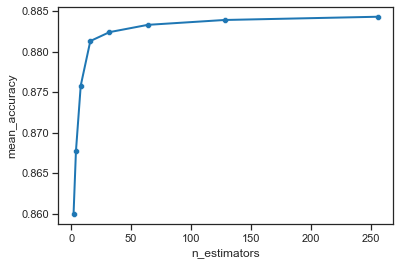

In [9]:
sns.scatterplot(data=sum_table, x='n_estimators', y='mean_accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='mean_accuracy')

t = sum_table[sum_table.mean_accuracy == np.max(sum_table['mean_accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'mean_accuracy']
t

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [11]:
param = pd.DataFrame(data={'ml_model':['random_forest'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [12]:
df.to_csv('../data/fight_stat_data_trained.csv', index=None)
print('../data/fight_stat_data_trained.csv saved.')

../data/fight_stat_data_trained.csv saved.
